In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
RF_reg_mse = metrics.mean_squared_error(y_test,
                                       prediction_normal_RF_reg)
r2_score = metrics.r2_score(y_test, prediction_normal_RF_reg)

NameError: name 'y_test' is not defined

In [4]:
breast = datasets.load_breast_cancer()

In [5]:
df = pd.DataFrame(breast.data, columns=breast.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
X_train, X_test, y_train, y_test = train_test_split(breast.data, breast.target, test_size=0.3)

In [19]:
model_DT = RandomForestClassifier()

In [20]:
max_features = ['sqrt' , 'log2', None]
max_depth = [1, 5]
min_samples_split = [5, 10]
min_samples_leaf = [5, 10]
criterion = ['gini', 'entropy']

In [21]:
random_grid = {
    'max_features' : max_features,
    'min_samples_leaf' : min_samples_leaf,
    'max_depth': max_depth,
    'min_samples_split' : min_samples_split,
    'criterion': criterion,
}
print(random_grid)

{'max_features': ['sqrt', 'log2', None], 'min_samples_leaf': [5, 10], 'max_depth': [1, 5], 'min_samples_split': [5, 10], 'criterion': ['gini', 'entropy']}


In [22]:
model_grid = GridSearchCV(estimator = model_DT,
                         param_grid = random_grid,
                         n_jobs = -1,
                         cv = 5)

In [23]:
model_grid.fit(X_train, y_train)

C:\Users\zlslsp54\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\zlslsp54\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': ['sqrt', 'log2', None], 'min_samples_leaf': [5, 10], 'max_depth': [1, 5], 'min_samples_split': [5, 10], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
model_grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [25]:
h = model_grid.best_estimator_

In [26]:
prediction_grid_DT = h.predict(X_test)

In [27]:
print('Accuracy: %.2f' % metrics.accuracy_score(y_test, prediction_grid_DT))

Accuracy: 0.94


In [8]:
model_DT.fit(X_train, y_train)

C:\Users\zlslsp54\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
prediction_DT = model_DT.predict(X_test)

In [10]:
print('Accuracy: %.2f' % metrics.accuracy_score(y_test, prediction_DT))

Accuracy: 0.90


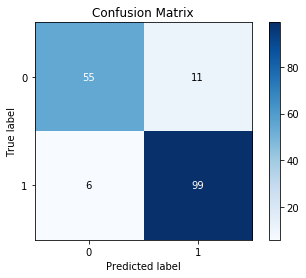

In [11]:
skplt.metrics.plot_confusion_matrix(y_test, prediction_DT)
plt.show()

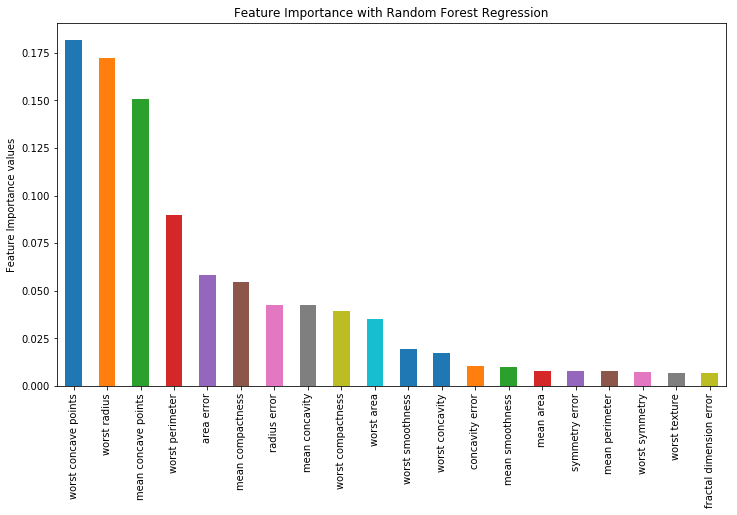

In [13]:
imp_feat_rf = pd.Series(model_DT.feature_importances_, 
                        index = breast.feature_names).sort_values(ascending=False)
imp_feat_rf[:20].plot(kind='bar', title='Feature Importance with Random Forest Regression', figsize=(12,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.show()

In [14]:
pr = model_DT.predict_proba(X_test)[:,1]

In [15]:
fpr, tpr, threshold = metrics.roc_curve(y_test, pr)

In [16]:
roc_auc = metrics.auc(fpr,tpr)

In [17]:
roc_auc = metrics.auc(fpr, tpr)

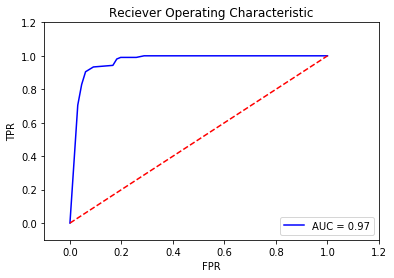

In [18]:
plt.title('Reciever Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1 , 1.2])
plt.ylim([-0.1 , 1.2])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [32]:
from sklearn.ensemble import VotingClassifier

In [35]:
model_DT_2 = DecisionTreeClassifier()

In [ ]:
# model_DT = RandomForestClassifier()

In [36]:
vote_RF_GB = VotingClassifier(estimators = [('RF', model_DT),('DT', model_DT_2)],voting='soft', n_jobs=-1)

In [37]:
vote_RF_GB.fit(X_train, y_train)

VotingClassifier(estimators=[('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=-1, voting='soft', weights=None)

In [38]:
prediction_vote_RF_GB = vote_RF_GB.predict(X_test)

In [39]:
print('Accuracy: %.2f' % metrics.accuracy_score(y_test, prediction_vote_RF_GB))

Accuracy: 0.93


Feature Importance는 구할 수 없다.

In [40]:
imp_feat_rf = pd.Series(model_DT.feature_importances_, 
                        index = breast.feature_names).sort_values(ascending=False)
imp_feat_rf[:20].plot(kind='bar', title='Feature Importance with Random Forest Regression', figsize=(12,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.show()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [41]:
pr = vote_RF_GB.predict_proba(X_test)[:,1]

In [43]:
fpr, tpr, threshold = metrics.roc_curve(y_test, pr)
roc_auc =metrics.auc(fpr, tpr)

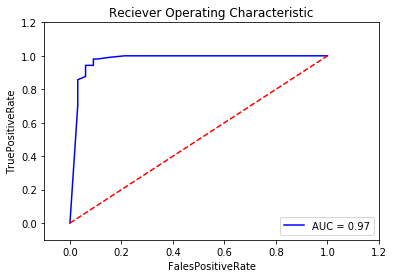

In [44]:

plt.title('Reciever Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1 , 1.2])
plt.ylim([-0.1 , 1.2])
plt.ylabel('TruePositiveRate')
plt.xlabel('FalesPositiveRate')
plt.show()

In [45]:
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 50, num = 2)]
max_feature = ['sqrt', 'log2', None]
max_depth = [1,5,10]
min_samples_split = [5, 10]
min_samples_split = [5, 10]

In [62]:
vote_random_grid = {
    'RF__n_estimators': n_estimators,
    'RF__max_features' : max_features,
#    'RF_min_samples_leaf' : min_samples_leaf,
#    'RF_max_depth': max_depth,
#    'RF_min_samples_split' : min_samples_split,
    
    'DT__n_estimators': n_estimators,
    'DT__max_features' : max_features,
#    'GB_min_samples_leaf' : min_samples_leaf,
#    'GB_max_depth': max_depth,
#    'GB_min_samples_split' : min_samples_split
}
print(vote_random_grid)

{'RF__n_estimators': [20, 50], 'RF__max_features': ['sqrt', 'log2', None], 'DT__n_estimators': [20, 50], 'DT__max_features': ['sqrt', 'log2', None]}


In [63]:
grid_vote = GridSearchCV(vote_RF_GB, param_grid = vote_random_grid, cv = 5, n_jobs = -1)

In [67]:
grid_vote_best = grid_vote.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
prdiction_grid_vote = grid